# Lightlab inside LabSpire Demo
This demo is meant to showcase two things:
- Running existing `lightlab.equipment.lab_instruments` drivers inside our LabSpire platform
- Running `lightlab.util` sweeps inside our Jupyter environment

## Basic Diagram of lab set-up
Here is a basic diagram of the remote set-up that we are currently working with.

<img src="./demo_pic.jpg" width="400">

In the picture above, the Voltage Source refers to the Keithley 2606B SMU that we are using, and we will be changing the voltage and observing the corresponding current changes.

## Remote Connection Set-up
For reference, this is how we will be communicating with the set-up hosted in the lab.

<img src="./remote.png" width="800">

This section below contains some "Jupyter features" that are built-in. This extension in particular auto reloads any imported Python packages when changes are made.

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Lightlab Equipment Drivers in LabSpire

In this portion of the demo, we will perform some basic operations with the Keithley SMU. This is done using a modified version of a lightlab driver for the Keithley 2606B SMU. This part of the demo is meant to show how a "local" driver can now be run remotely after specific changes are made.

To start out, we connect to the resource, then attempt to ask for its ID

In [34]:
from lightlab.equipment.lab_instruments import Remote_Keithley_2606B_SMU as Ke

instr = Ke(address='GPIB0::29::INSTR',url="https://1000000031c956ca-api.nwtech.win/", tsp_node=1, channel="A", tempSess=False)

In [38]:
instr.id_string

There are some essential methods as detailed by `lightlab`, so we will go through most of these next.

In [39]:
instr.essentialMethods

['startup',
 'setCurrent',
 'getCurrent',
 'measVoltage',
 'setProtectionVoltage',
 'protectionVoltage',
 'setProtectionCurrent',
 'protectionCurrent',
 'enable',
 'setCurrentMode',
 'setVoltageMode',
 'setVoltage',
 'getVoltage',
 'measCurrent']

We'll start with setting the voltage, then checking that the voltage has been set correctly.

In [40]:
# Test Voltage
print(f"Voltage setting: {instr.getVoltage()} V")

print("Setting to 1 V")
instr.setVoltage(1)

print(f"Voltage setting: {instr.getVoltage()} V")
print()

print("Setting to 2 V")
instr.setVoltage(2)
print(f"Voltage setting: {instr.getVoltage()} V")

2021-03-11 00:40:02,718 - ERROR - lightlab.visa:
	Problem querying to GPIB0::29::INSTR


OPEN_RESOURCE FAILED: MUST CONNECT BEFORE OPEN


AttributeError: 'bool' object has no attribute 'query'

We do the same thing with the current.

In [14]:
# Test Current
print(f"Current setting: {instr.getCurrent()} A")
print("Setting to 0 A")
instr.setCurrent(0)
print(f"Current setting: {instr.getCurrent()} A")

print("Setting to 0.001 A")
instr.setCurrent(0.001)
print(f"Current setting: {instr.getCurrent()} A")


RESOURCE SUCCESSFULLY CLOSED
1.0
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
1e-09
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
1.0


In [65]:
# Test protection voltage
print(f"Protection voltage: {instr.protectionVoltage}")

print("Setting protection voltage to 2 V...")
instr.setProtectionVoltage(2)
print(f"Protection voltage: {instr.protectionVoltage}")

print("Setting protection voltage to 4 V...")
instr.setProtectionVoltage(4)
print(f"Protection voltage: {instr.protectionVoltage}")

RESOURCE SUCCESSFULLY CLOSED
5.0
RESOURCE SUCCESSFULLY CLOSED
2.0
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
2.0
RESOURCE SUCCESSFULLY CLOSED
1.0
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
5.0


In [65]:
# Test protection current
print(f"Protection current: {instr.protectionVoltage}")

print("Setting protection voltage to 0.01 A...")
instr.setProtectionVoltage(0.01)
print(f"Protection current: {instr.protectionCurrent}")

RESOURCE SUCCESSFULLY CLOSED
5.0
RESOURCE SUCCESSFULLY CLOSED
2.0
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
2.0
RESOURCE SUCCESSFULLY CLOSED
1.0
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
RESOURCE SUCCESSFULLY CLOSED
5.0


Now that we've confirmed it works, let us set up the correct limits

In [ ]:
instr.setProtectionVoltage(4) # set 4 V voltage limit
instr.setProtectionCurrent(0.01) # set 10 mA current limit

Now I'll quickly demonstrate how you can make single measurements

I'll change the voltage, set the output on, then proceed to read the current value

In [41]:
instr.setVoltage(0)

2021-03-11 00:45:58,144 - ERROR - lightlab.visa:
	Problem querying to GPIB0::29::INSTR


AttributeError: 'bool' object has no attribute 'query'

In [ ]:
instr.enable(newState=True)

In [ ]:
print(f"Current value: {instr.measCurrent()} A")

In [ ]:
instr.setVoltage(1)

In [ ]:
print(f"Current value: {instr.measCurrent()} A")

In [ ]:
instr.setVoltage(0)

In [ ]:
print(f"Current value: {instr.measCurrent()} A")

In [ ]:
instr.enable(newState=False)

## Lightlab sweeps
Next, we will perform a sweep from 0 V to 4 V using the `lightlab` class `NdSweeper`. We will measure the current as it changes, then plot the result below

Printing progress in tempfile /home/jovyan/work/shared/demos/rvisa_lightlab/progress-monitor/swp_progwx4y5e18
Generic sweep in Voltage
Dim-0...
1/12...
2/12...
3/12...
4/12...
5/12...
6/12...
7/12...
8/12...
9/12...
10/12...
11/12...
12/12...
Sweep completed!


array([[<AxesSubplot:xlabel='Voltage', ylabel='Current'>]], dtype=object)

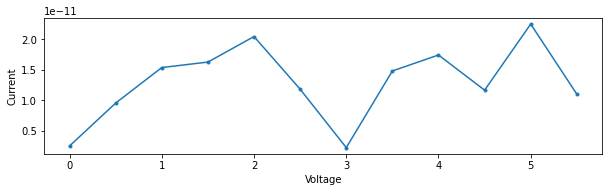

In [31]:
# Testing sweeps
from lightlab.util.sweep import NdSweeper
import numpy
from lightlab.equipment.lab_instruments import Remote_Keithley_2606B_SMU as Ke
instr = Ke(address='GPIB0::29::INSTR',url="https://1000000031c956ca-api.nwtech.win/", tsp_node=1, channel="A", tempSess=False)
tsweep=NdSweeper()

instr.setProtectionVoltage(4) # set 4 V voltage limit
instr.setProtectionCurrent(0.01) # set 10 mA current limit
domain=numpy.arange(0,6,0.5)
instr.enable(newState=True)
tsweep.addActuation("Voltage",lambda v: instr.setVoltage(v),domain)
tsweep.addMeasurement("Current",lambda: instr.measCurrent())
tsweep.gather(3)
instr.enable(newState=0)
instr.setVoltage(0)
tsweep.plot()